In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
%matplotlib inline

import time
from datetime import datetime

In [4]:
df = pd.read_csv("./content/train_enriched.csv")

In [47]:
df=df[df.target==0]

In [56]:
df

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
0,D,32.0,32.0,0,2020-10-12,100.0,NaN,NaN,0,0,...,17.0,NaN,0.0,163.0,6694527,4.0,0,12.0,8.0,0.0
1,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,6712877,NaN,0,NaN,NaN,NaN
2,D,NaN,NaN,0,2022-08-04,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6659444,NaN,0,NaN,NaN,NaN
3,B,NaN,1.0,1,2022-09-26,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7151591,NaN,0,NaN,NaN,NaN
4,A,NaN,30.0,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6705666,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,D,NaN,27.0,1,NaN,NaN,NaN,40.0,1,0,...,NaN,NaN,NaN,NaN,6816668,5.0,0,NaN,NaN,NaN
199996,D,NaN,NaN,0,2022-04-25,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6984939,NaN,0,NaN,NaN,NaN
199997,D,0.0,17.0,0,2022-08-11,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,NaN,6670084,3.0,0,0.0,0.0,0.0
199998,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6917324,NaN,0,NaN,NaN,NaN


In [48]:
df.isna().sum()

ABC                                 0
activity                        92469
age_indicator                   36610
auto_payment                        0
available_program_starts_on      9960
                                ...  
support_feedback_avg           143720
target                              0
test_with_good_mark             92469
test_with_great_mark            92469
webinars                        92469
Length: 67, dtype: int64

In [5]:
n=df[df.target==0].isnull().sum(axis=1)
n

0         27
1         45
2         41
3         37
4         44
          ..
199995    38
199996    40
199997    27
199998    34
199999    31
Length: 174301, dtype: int64

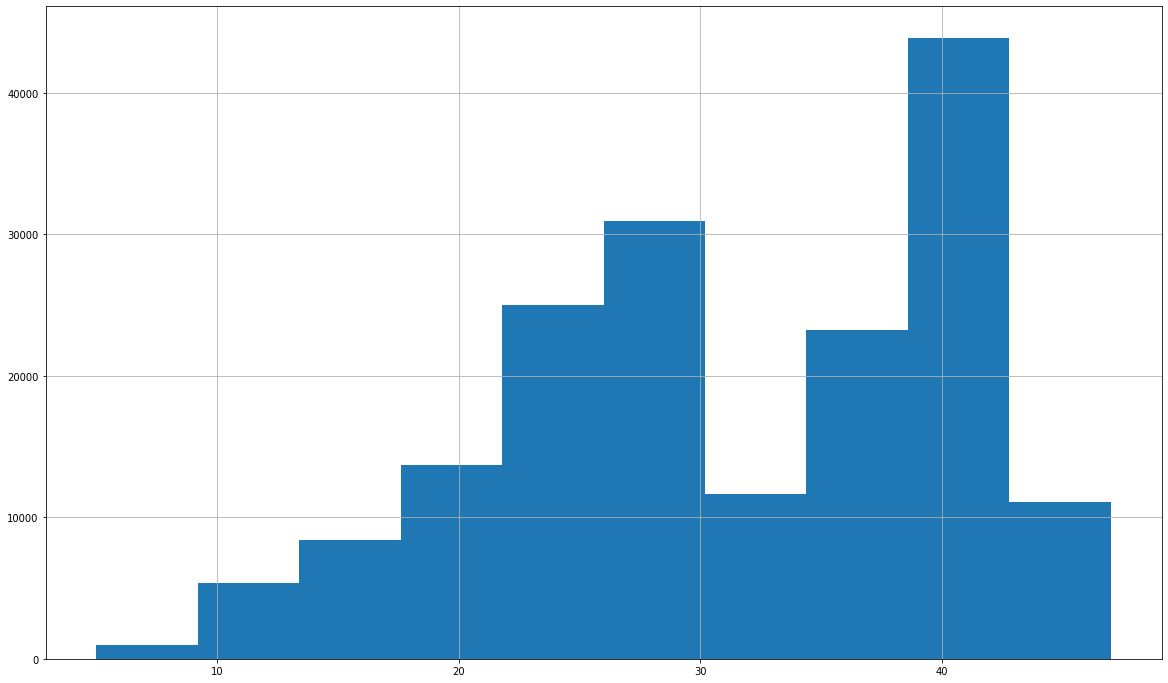

In [50]:
_ = df.isnull().sum(axis=1).hist(figsize=(20,12))

In [7]:
n[n>38].index

Int64Index([     1,      2,      4,      7,      9,     13,     21,     24,
                31,     37,
            ...
            199972, 199973, 199974, 199975, 199976, 199979, 199987, 199990,
            199991, 199996],
           dtype='int64', length=55006)

In [43]:
from collections import Counter
class_counts = Counter(df.target).most_common()
class_counts

[(0, 174301), (1, 13512), (5, 3678), (4, 3659), (3, 3027), (2, 1823)]

In [ ]:
df

In [44]:
dict([(cl[0], cl[1]) for cl in class_counts])

{0: 174301, 1: 13512, 5: 3678, 4: 3659, 3: 3027, 2: 1823}

In [34]:
df.lessons.unique()

array([14., nan,  3.,  2., 15., 11.,  1.,  4., 22., 31., 16.,  5.,  8.,
        9., 12., 23., 10., 13., 26.,  6.,  7., 18., 24., 20., 28., 17.,
       21., 19., 27., 29., 34., 47., 32., 42., 30., 25., 36., 43., 37.,
       40., 35., 45., 48., 33., 39., 56., 49., 44., 38., 83., 58., 41.,
       46., 52., 61., 50., 67., 51., 57., 62., 75., 84., 54.])

In [35]:
df.lessons.isna().sum()

102401

In [36]:
df[df.notes ==0]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars,notes_bin
5,A,2.0,NaN,1,2022-08-11,NaN,NaN,NaN,0,0,...,NaN,NaN,9.0,6784019,5.0,0,0.0,0.0,0.0,0
6,C,11.0,5.0,1,2022-08-05,NaN,97.000000,NaN,0,0,...,NaN,NaN,28.0,6409144,NaN,0,0.0,0.0,3.0,0
8,A,0.0,30.0,1,2022-08-19,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,6880163,5.0,3,0.0,0.0,0.0,0
10,B,38.0,32.0,1,2022-09-26,NaN,72.750000,NaN,0,0,...,NaN,NaN,102.0,7171931,NaN,0,0.0,0.0,8.0,0
11,A,0.0,NaN,1,2022-08-16,NaN,NaN,NaN,0,0,...,NaN,NaN,2.0,6661892,NaN,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199989,D,13.0,NaN,0,2022-09-12,100.0,NaN,NaN,0,0,...,NaN,0.0,336.0,7281452,NaN,0,0.0,0.0,2.0,0
199992,D,9.0,20.0,1,2022-08-25,NaN,NaN,NaN,0,0,...,4.0,NaN,2.0,5374325,NaN,4,4.0,4.0,0.0,0
199993,C,19.0,21.0,1,2022-08-24,100.0,NaN,NaN,0,0,...,NaN,0.0,29.0,7310456,NaN,0,0.0,0.0,23.0,0
199994,A,19.0,10.0,0,2022-08-15,100.0,81.641667,NaN,0,0,...,NaN,0.0,37.0,7320106,NaN,0,8.0,6.0,2.0,0


In [27]:
df['notes_bin']=df['notes'].apply(lambda n: n>0).astype(int)

In [28]:
df[df['notes_bin']==1]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars,notes_bin
0,D,32.0,32.0,0,2020-10-12,100.0,NaN,NaN,0,0,...,NaN,0.0,163.0,6694527,4.000000,0,12.0,8.0,0.0,1
36,B,29.0,40.0,1,2022-08-15,100.0,NaN,NaN,0,0,...,NaN,0.0,109.0,7398188,NaN,0,0.0,0.0,0.0,1
53,D,5.0,5.0,1,2022-08-03,NaN,NaN,NaN,0,0,...,NaN,NaN,38.0,7311012,NaN,0,0.0,0.0,6.0,1
76,A,31.0,33.0,1,2022-08-08,100.0,NaN,NaN,0,0,...,NaN,0.0,323.0,6687564,4.000000,1,28.0,28.0,1.0,1
132,C,26.0,18.0,0,2022-08-01,100.0,97.0,NaN,0,0,...,NaN,0.0,70.0,7211140,4.666667,1,12.0,10.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199898,D,1.0,NaN,0,2022-08-08,NaN,NaN,NaN,0,0,...,NaN,NaN,0.0,6672747,NaN,0,0.0,0.0,0.0,1
199932,D,12.0,31.0,1,2022-08-09,100.0,NaN,NaN,0,0,...,NaN,0.0,129.0,6570723,NaN,0,28.0,24.0,0.0,1
199950,B,58.0,31.0,0,2022-08-15,100.0,97.0,NaN,0,0,...,NaN,0.0,199.0,7236752,NaN,0,12.0,2.0,1.0,1
199981,D,37.0,30.0,0,2022-08-15,100.0,97.0,NaN,0,0,...,NaN,0.0,281.0,6184852,NaN,5,28.0,22.0,2.0,1


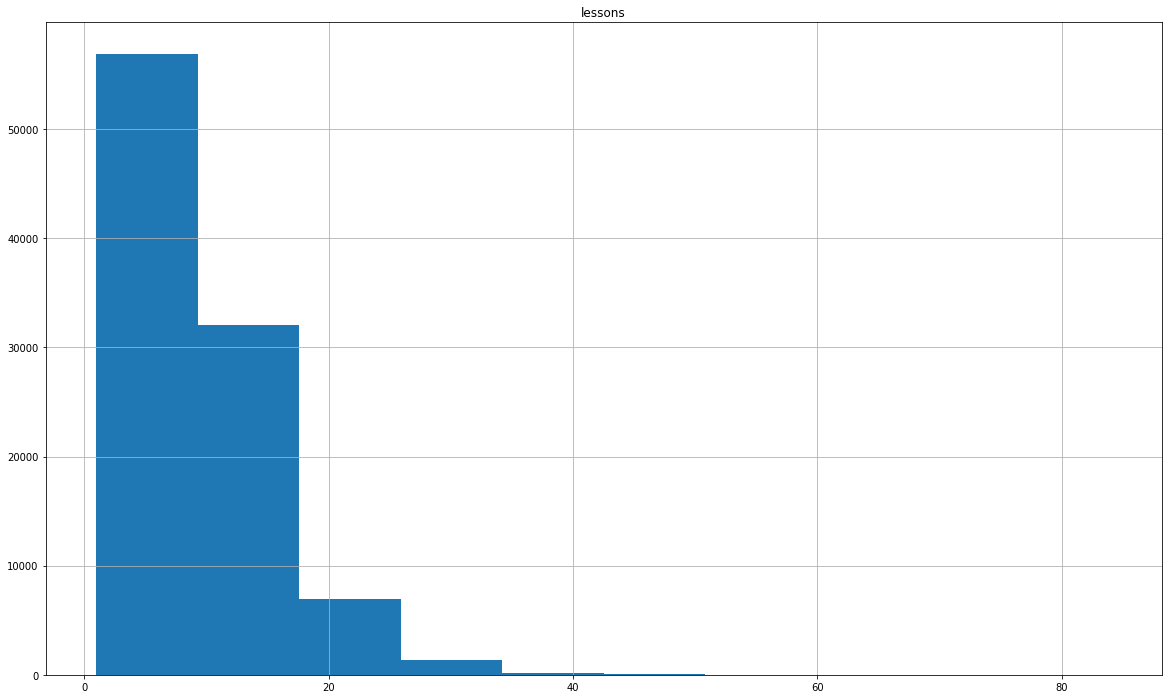

In [37]:
_ = df[["lessons"]].hist(figsize=(20,12))

In [124]:
cats = ['Windows', 'Mac OS X', 'iOS', 'Android', 'Linux', 'Ubuntu',
       'Chrome OS', 'Fedora']
def os_trans(row):
    os = row.os
    if os == 'iOS':
        os='Mac OS X'
    elif os=='Ubuntu'    or os=='Fedora':
        os='Linux'   
    row["os"]=os
    return row

In [125]:
df=df.apply(lambda row: os_trans(row), axis=1)

In [91]:
df["bought_total"] = df.bought_d1+df.bought_d2 + df.bought_d3+df.bought_d4+df.bought_d5

In [ ]:
df.platform=df.platform.apply(lambda p: 'mobile' if p =='tablet' else p)

In [126]:
df.os.unique()

array([nan, 'Windows', 'Mac OS X', 'Android', 'Linux', 'Chrome OS'],
      dtype=object)

In [104]:
df.platform.isna().sum()

122639

In [113]:
df.platform=df.platform.apply(lambda p: 'mobile' if p =='tablet' else p)

In [114]:
df.platform.unique()

array([nan, 'pc', 'mobile'], dtype=object)

In [116]:
os_le = preprocessing.LabelEncoder()
df["os"] = os_le.fit_transform(df["os"])

In [117]:
os_le_dict = dict(zip(os_le.classes_, os_le.transform(os_le.classes_)))
os_le_dict

{'Android': 0,
 'Chrome OS': 1,
 'Fedora': 2,
 'Linux': 3,
 'Mac OS X': 4,
 'Ubuntu': 5,
 'Windows': 6,
 'iOS': 7,
 nan: 8}

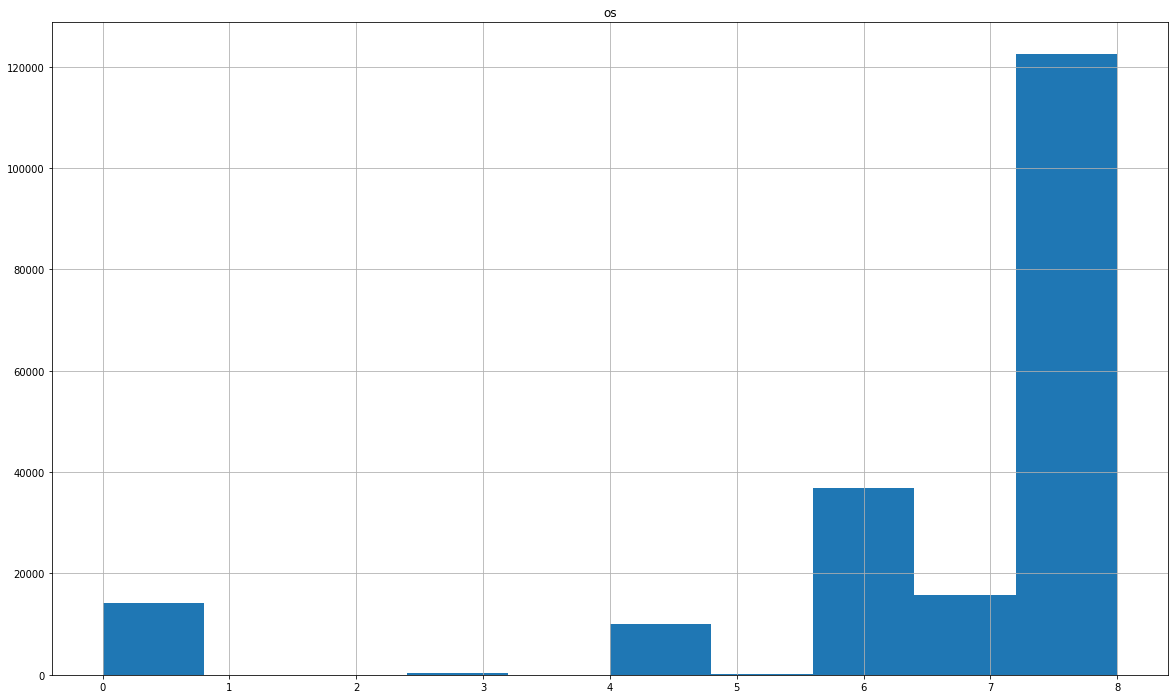

In [118]:
_ = df[["os"]].hist(figsize=(20,12))

In [102]:
df[df.os==8]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
0,D,32.0,32.0,0,2020-10-12,100.0,NaN,NaN,0,0,...,17.0,NaN,0.0,163.0,6694527,4.0,0,12.0,8.0,0.0
1,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,6712877,NaN,0,NaN,NaN,NaN
2,D,NaN,NaN,0,2022-08-04,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6659444,NaN,0,NaN,NaN,NaN
4,A,NaN,30.0,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6705666,NaN,0,NaN,NaN,NaN
7,A,NaN,NaN,1,2022-08-25,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6314133,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199990,D,NaN,27.0,0,2022-08-08,NaN,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,5724556,NaN,0,NaN,NaN,NaN
199991,D,NaN,NaN,1,2022-08-24,NaN,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,6725999,NaN,0,NaN,NaN,NaN
199992,D,9.0,20.0,1,2022-08-25,NaN,NaN,NaN,0,0,...,0.0,4.0,NaN,2.0,5374325,NaN,4,4.0,4.0,0.0
199995,D,NaN,27.0,1,NaN,NaN,NaN,40.0,1,0,...,NaN,NaN,NaN,NaN,6816668,5.0,0,NaN,NaN,NaN


In [93]:
df.bought_avg_duration.isna().sum()

189641

In [73]:
df.gender.astype(int)

0         1
1         0
2         0
3         1
4         1
         ..
199995    1
199996    0
199997    1
199998    0
199999    1
Name: gender, Length: 200000, dtype: int32

In [64]:
df.carts_created_at.isna().sum()

0

In [57]:
df[cols].isna().all(axis=1).sum()

1358

In [60]:
d=df[~df[cols].isna().all(axis=1)]

In [61]:
d

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
0,D,32.0,32.0,0,2020-10-12,100.0,NaN,NaN,0,0,...,17.0,NaN,0.0,163.0,6694527,4.0,0,12.0,8.0,0.0
2,D,NaN,NaN,0,2022-08-04,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6659444,NaN,0,NaN,NaN,NaN
3,B,NaN,1.0,1,2022-09-26,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7151591,NaN,0,NaN,NaN,NaN
4,A,NaN,30.0,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6705666,NaN,0,NaN,NaN,NaN
5,A,2.0,NaN,1,2022-08-11,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,9.0,6784019,5.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,D,NaN,27.0,1,NaN,NaN,NaN,40.0,1,0,...,NaN,NaN,NaN,NaN,6816668,5.0,0,NaN,NaN,NaN
199996,D,NaN,NaN,0,2022-04-25,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6984939,NaN,0,NaN,NaN,NaN
199997,D,0.0,17.0,0,2022-08-11,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,NaN,6670084,3.0,0,0.0,0.0,0.0
199998,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6917324,NaN,0,NaN,NaN,NaN


In [55]:
cols =[
    "age_indicator",
"feedback_avg_d1",
"feedback_avg_d3",
"feedback_avg_d5",
"feedback_avg_d4",
"feedback_avg_d2",
"support_feedback_avg",
"bought_avg_duration",
"m_was_conversations",
"p_was_conversations",
"current_program_starts_on",
]

In [46]:
df_n.isna().all(axis=1).sum()

1358

In [48]:
nu=df[df_n.isna().all(axis=1)]


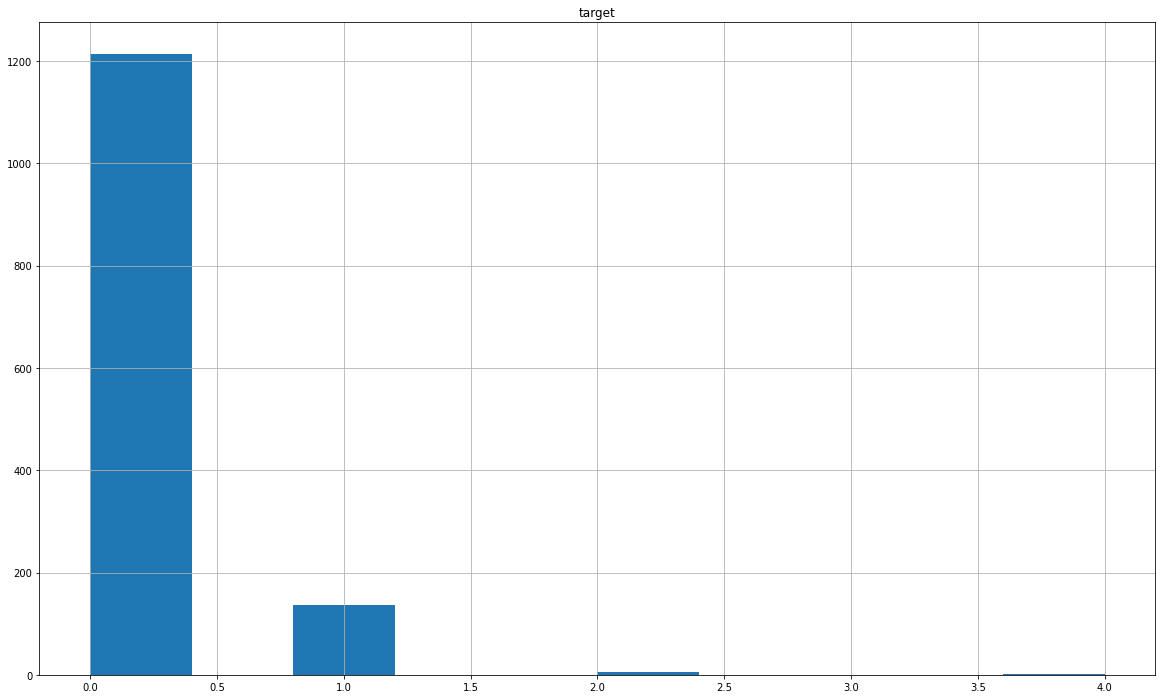

In [49]:
_ = nu[["target"]].hist(figsize=(20,12))

In [51]:
df[df.target==1]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
12,B,NaN,18.0,0,2022-08-08,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7087690,NaN,1,NaN,NaN,NaN
14,D,30.0,30.0,0,2022-08-08,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,69.0,6849570,NaN,1,0.0,0.0,0.0
17,D,NaN,NaN,1,2021-10-27,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6945634,NaN,1,NaN,NaN,NaN
19,A,39.0,NaN,1,NaN,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,120.0,6839888,NaN,1,0.0,0.0,0.0
57,A,12.0,37.0,1,2022-08-11,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,201.0,6984343,NaN,1,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199819,B,NaN,NaN,0,2022-08-01,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7119934,5.0,1,NaN,NaN,NaN
199892,D,NaN,5.0,0,2020-10-12,NaN,NaN,NaN,0,0,...,NaN,1.0,NaN,NaN,6327006,NaN,1,NaN,NaN,NaN
199899,D,0.0,11.0,0,2022-08-29,100.0,NaN,NaN,0,0,...,0.0,NaN,NaN,NaN,6918711,NaN,1,0.0,0.0,0.0
199921,D,2.0,NaN,1,2022-08-11,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,1.0,6798177,NaN,1,0.0,0.0,0.0


In [52]:
nu[nu.target==1]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
19,A,39.0,NaN,1,NaN,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,120.0,6839888,NaN,1,0.0,0.0,0.0
593,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6839888,NaN,1,NaN,NaN,NaN
5298,B,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6210807,NaN,1,NaN,NaN,NaN
6438,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6989032,NaN,1,NaN,NaN,NaN
11459,B,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7076989,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193491,A,2.0,NaN,1,NaN,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,0.0,5294315,NaN,1,0.0,0.0,0.0
194874,C,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7038836,NaN,1,NaN,NaN,NaN
196332,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,7191172,NaN,1,NaN,NaN,NaN
196404,A,0.0,NaN,1,NaN,NaN,NaN,NaN,0,0,...,0.0,NaN,NaN,NaN,5294315,NaN,1,0.0,0.0,0.0


In [22]:
df_test = pd.read_csv("./content/test_enriched.csv")

In [23]:
df.shape

(200000, 67)

In [24]:
df_test.shape

(84997, 66)

In [25]:
len(set(list(df.student_id.unique())))

31153

In [26]:
diff=set(list(df_test.student_id.unique())) - set(list(df.student_id.unique()))
diff

{7532547,
 7536644,
 7475205,
 7012358,
 7524359,
 7217161,
 7557130,
 7557134,
 7086096,
 7544849,
 7483411,
 7489556,
 7522325,
 7272468,
 7567386,
 7571483,
 7581724,
 7567389,
 6219806,
 7548960,
 7540770,
 7583780,
 7168038,
 7557164,
 7522349,
 7544881,
 7567411,
 7508021,
 7561269,
 4945975,
 7426106,
 7538687,
 7538747,
 7557179,
 7514174,
 7436346,
 7579707,
 7583804,
 7563331,
 7542852,
 7542855,
 7497802,
 7561290,
 7567434,
 6623309,
 7475278,
 7563342,
 7514193,
 7544914,
 7497811,
 7387219,
 7497813,
 7379029,
 7532631,
 7534679,
 7536728,
 7538771,
 7559251,
 4946006,
 7567447,
 7522398,
 7569502,
 7491680,
 6836320,
 7557217,
 7440475,
 7311460,
 7583839,
 5793895,
 7524459,
 7569518,
 7540848,
 7557232,
 7161970,
 7565424,
 7569522,
 7514229,
 7555189,
 6789236,
 7446644,
 5392506,
 7569530,
 7549053,
 7532673,
 7547010,
 7467140,
 7553158,
 7440519,
 6469768,
 7475337,
 7575686,
 7442571,
 7569548,
 7530639,
 7555217,
 7100564,
 7495829,
 7516311,
 7522455,
 7538840,


In [27]:
len(set(list(df_test.student_id.unique())))

26833

In [28]:
len(diff)

1158

In [17]:
df.current_program_starts_on

0         2020-10-12
1                NaN
2         2022-08-04
3         2022-09-26
4                NaN
             ...    
199995           NaN
199996    2022-04-25
199997    2022-08-11
199998           NaN
199999    2022-08-12
Name: current_program_starts_on, Length: 200000, dtype: object

In [214]:
df['current_program_starts_on_day'] = pd.to_datetime(df['current_program_starts_on']).dt.strftime("%d")
df['current_program_starts_on_month'] = pd.to_datetime(df['current_program_starts_on']).dt.strftime("%m")
df['current_program_starts_on_year'] = pd.to_datetime(df['current_program_starts_on']).dt.strftime("%Y")

In [215]:
df['current_program_starts_on_month'] 

0          10
1         NaN
2          08
3          09
4         NaN
         ... 
199995    NaN
199996     04
199997     08
199998    NaN
199999     08
Name: current_program_starts_on_month, Length: 200000, dtype: object

In [194]:
df[['program_duration']]=df[['program_duration']].fillna('0 недель')

In [198]:
df.program_duration

0          0
1          0
2         48
3         16
4          0
          ..
199995     0
199996     0
199997    32
199998     8
199999    60
Name: program_duration, Length: 200000, dtype: int64

In [173]:
df[df.program_duration.isna()]

,ABC,activity,age_indicator,auto_payment,available_program_starts_on,avg_hw_mark,avg_quiz_result,bought_avg_duration,bought_d1,bought_d2,...,reworked_hw,speed_recall,spent_time_to_complete_hw,spent_time_total,student_id,support_feedback_avg,target,test_with_good_mark,test_with_great_mark,webinars
0,D,32,32,0,2020-10-12,100,NaN,NaN,0,0,...,17,NaN,0,163,6694527,4,0,12,8,0
1,A,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,...,NaN,1,NaN,NaN,6712877,NaN,0,NaN,NaN,NaN
4,A,NaN,30,1,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6705666,NaN,0,NaN,NaN,NaN
13,D,NaN,NaN,0,2022-09-12,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6677993,NaN,0,NaN,NaN,NaN
17,D,NaN,NaN,1,2021-10-27,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6945634,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199972,D,NaN,19,0,2021-02-15,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,6905728,NaN,0,NaN,NaN,NaN
199978,D,1,10,0,2022-09-12,NaN,NaN,NaN,0,0,...,0,NaN,0,0,6788959,NaN,0,0,0,0
199990,D,NaN,27,0,2022-08-08,NaN,NaN,NaN,0,0,...,NaN,1,NaN,NaN,5724556,NaN,0,NaN,NaN,NaN
199995,D,NaN,27,1,NaN,NaN,NaN,40,1,0,...,NaN,NaN,NaN,NaN,6816668,5,0,NaN,NaN,NaN


In [196]:
def transform_duration(row):
    program_duration = str(row.program_duration)
    splt =  program_duration.split(' ')
    unit = splt[1][0:3]
    number = int(splt[0])
    if unit =='мес':
        number=number*4
    row['program_duration'] =     number
    return row


In [197]:
#df[['program_duration']]=df[['program_duration']].fillna('0 недель')
df=df.apply(lambda row: transform_duration(row), axis=1)


In [168]:
program_starting_soon_le = preprocessing.LabelEncoder()
df["program_starting_soon"] = program_starting_soon_le.fit_transform(df["program_starting_soon"])


In [169]:
df.program_starting_soon

0         2
1         2
2         1
3         0
4         2
         ..
199995    2
199996    2
199997    0
199998    0
199999    0
Name: program_starting_soon, Length: 200000, dtype: int32

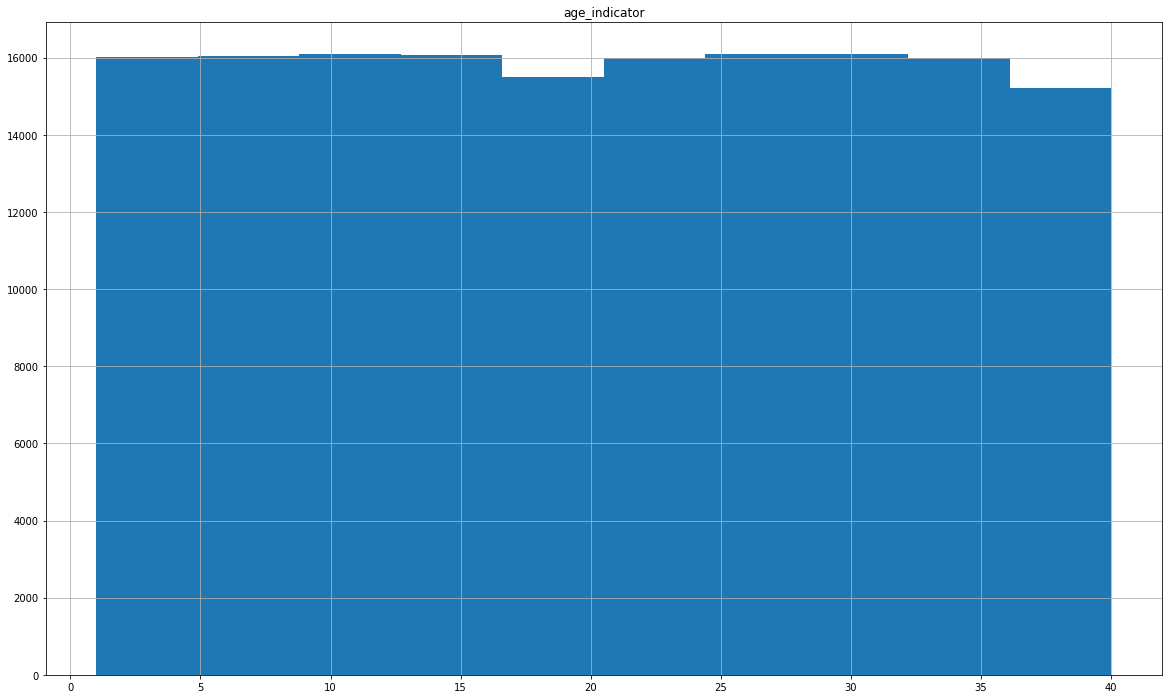

In [32]:
_ = df[["age_indicator"]].hist(figsize=(20,12))

In [127]:
df.program_id.unique()

array([1469, 1392,  376, 1160,  952,  789,  242,  998,  459,  871, 1688,
       1287, 1609,  508, 1059, 1605,  887, 1230, 1523, 1248,  836,  581,
       1756,  138,  485,  490, 1685, 1470, 2097,  518, 1602, 1131, 1304,
        643,  724,  580, 1635, 1045,  176, 1697, 1049,  552,  489,  223,
       1360,  791,   73,  711,  366, 1330, 2395,  999, 1209,  166, 1193,
       2067,  617, 1540, 1110,  562, 1227,  381,  784, 1839, 1233, 1026,
        229,  211,  916, 1562,  910,  551, 1991, 2008, 1595, 1461,  584,
        365,  913,   84, 1153, 1683, 1757, 1987,  469, 1157, 1966,   47,
        245, 2361,  288,  239,  909,  929, 1394, 1126, 1725, 1545, 1166,
        434,  642,  476, 1543,  806, 1104,  549, 1891, 1008, 1158,  928,
       1239,  505, 1777, 2127, 1774, 1661,  516,  807,  943, 1050,  751,
       1539,   12,  991, 1100, 1510, 1452, 1711,   80, 1125, 1169, 1792,
       1954, 1584, 1138, 2114, 1917, 1395, 1374, 1773, 2013, 1718,  423,
       1336, 1051, 1796,  318, 2057,  924, 1036, 15

In [129]:
df.target.unique()

array([0, 3, 1, 4, 5, 2], dtype=int64)

In [128]:
df.program_id.unique().size

267

In [122]:
df['age_indicator'].fillna((df['age_indicator'].median()), inplace=True)

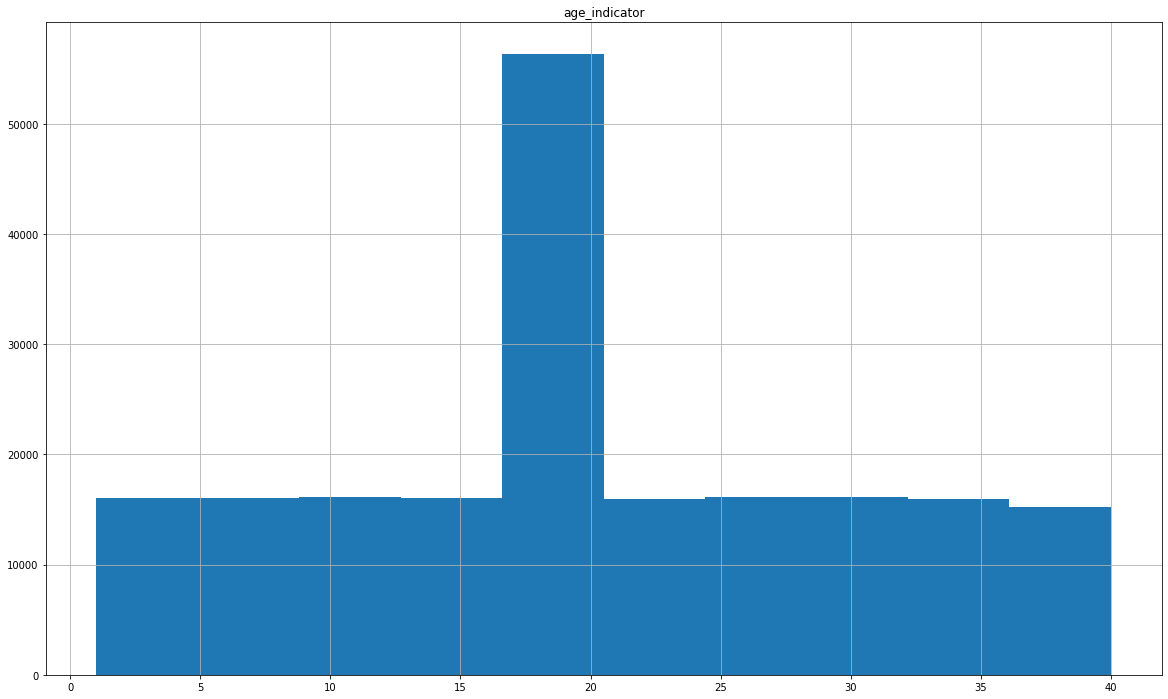

In [123]:
_ = df[["age_indicator"]].hist(figsize=(20,12))

In [63]:
df_test = pd.read_csv("./content/test.csv")

In [114]:
df["platform"].unique()

array([nan, 'pc', 'mobile', 'tablet'], dtype=object)

In [115]:
df_test["platform"].unique()

array(['pc', 'mobile', nan, 'tablet'], dtype=object)

In [81]:
df_test['city'].unique()

array([nan, 'Москва', 'Балашиха', 'Пермь', 'Красноярск', 'Пенза',
       'Санкт-Петербург', 'Самара', ' Пенза', 'Уфа', 'Иннополис',
       'Ногинск', 'Бостон', 'Люберцы', 'Astana', 'Минск', 'Кемерово',
       'Ленинградская область', 'Ростов-на-Дону', 'Дмитров',
       'Ханты-Мансийск', 'казань', 'Волжский', 'Магнитогорск',
       'Губкинский', 'Новосибирск', 'КЧР, Урупский р-н, пгт Медногорский',
       'Бийск', 'Волгоград', 'Лобня', 'Краснодар', 'Оренбург', 'Юрмала',
       'Нурлат', 'Астана', 'Владивосток', 'Донецк', 'Благовещенск',
       'Иркутск', 'п. Каинская заимка', 'г. Волгоград', 'Севастополь',
       'Екатеринбург', 'Электросталь', 'Воронеж', 'Череповец',
       'Нижний Новгород', 'Караганда', 'СПб', 'Moscow', 'Петрозаводск11',
       'Симферополь', 'Brussels', 'Новомосковск', 'Московская область',
       'Бишкек', 'Нижний Тагил', 'Новоуральск', 'Киев', 'Ульяновск',
       'Омск', 'Калуга', 'Ижевск', 'Красногорск', 'Прага', 'Рязань',
       'Йошкар-Ола', 'Тула', 'Тюмень', '

In [109]:
df['country'].unique()

array([nan, 'Россия', 'Украина', 'Беларусь', 'Кипр', 'РФ', 'Казахстан',
       'Канада', 'Германия', 'Чешская Республика', 'Росссия', 'Латвия',
       'Кыргызская Республика', 'Франция', '<span>Россия</span>',
       'Польша', 'США', 'Кыргызстан', 'Швейцария', 'Япония', 'Узбекистан',
       'Эстония', 'Чили', 'Великобритания', 'Netherlands', 'Бельгия',
       'Нидерланды', 'Латвия ', 'Китай', 'Испания', 'Молдова', 'Израиль',
       'Турция', 'Словакия', 'Люксембург', 'Республика Беларусь',
       'Финляндия', 'Литва', 'Италия', 'Черногория'], dtype=object)

In [100]:
def replace_country(row):
    country=row['country']
    if country in ['Россия', '<span>Россия</span>', 'Росссия','РФ']:
         row['country']= "Россия"
    return row

In [110]:
df = df.apply(lambda row: replace_country(row), axis=1)
df['country'][16]

'Россия'

In [112]:
df['country'][55]

'Украина'

In [80]:
os_le = preprocessing.LabelEncoder()
df["os"] = os_le.fit_transform(df["os"])

browser_le = preprocessing.LabelEncoder()
df["browser"] = browser_le.fit_transform(df["browser"])

platform_le = preprocessing.LabelEncoder()
df["platform"] = platform_le.fit_transform(df["platform"])

In [67]:
df['promo']=df['promo'].apply(lambda promo: promo =='+').astype(int)

0         1
1         0
2         1
3         0
4         0
         ..
199995    1
199996    0
199997    1
199998    0
199999    0
Name: promo, Length: 200000, dtype: int32

In [ ]:
ct_le = preprocessing.LabelEncoder()
df["communication_type"] = ct_le.fit_transform(df["communication_type"])

In [69]:
df_test['communication_type'].unique()

array(['order', 'web', 'phone', nan], dtype=object)

In [74]:
ct_le = preprocessing.LabelEncoder()
df["communication_type"] = ct_le.fit_transform(df["communication_type"])

0     1
1     0
2     2
3     0
4     0
5     0
6     2
7     0
8     0
9     0
10    1
11    3
Name: communication_type, dtype: int64

In [72]:
list(ct_le.classes_)

['order', 'phone', 'web', nan]

In [3]:
df.shape

(200000, 59)

In [4]:
df.student_id.unique().size

31153

In [5]:
df.program_id.unique().size

267

In [6]:
df.groupby(['student_id', 'program_id'])['program_id'].count()

student_id  program_id
492         1360          11
771         998           11
838         73            14
883         84            10
            223           14
                          ..
7947725     1757           4
7969075     2429           1
7981619     1635           3
7999554     1635           4
8010481     784            3
Name: program_id, Length: 32853, dtype: int64

In [7]:
df.ABC.unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [8]:
abc_le = preprocessing.LabelEncoder()
df["ABC"] = abc_le.fit_transform(df["ABC"])

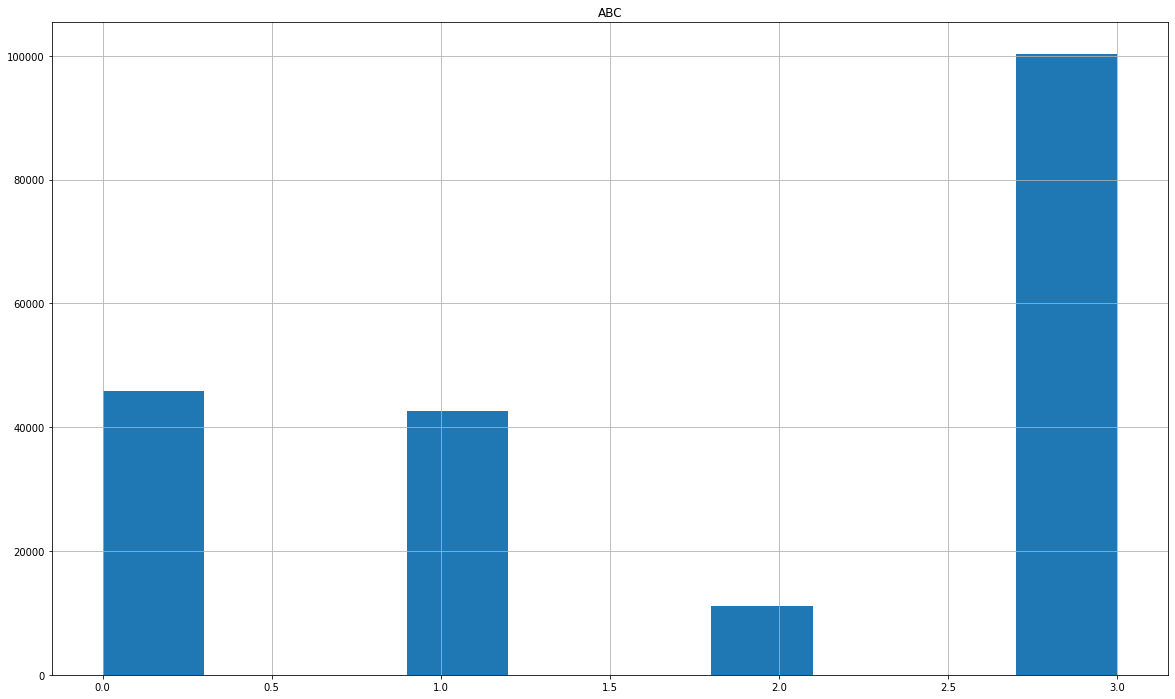

In [11]:
_ = df[["ABC"]].hist(figsize=(20,12))

In [19]:
df['control_year'] = pd.to_datetime(df['month_id']).dt.strftime("%y").astype(int)

In [ ]:
df['control_month'] = pd.to_datetime(df['month_id']).dt.strftime("%m").astype(int)

In [28]:
df['cart_day'] = pd.to_datetime(df['carts_created_at']).dt.strftime("%d").astype(int)

In [29]:
df['cart_month'] = pd.to_datetime(df['carts_created_at']).dt.strftime("%m").astype(int)

0         20
1         20
2         20
3         21
4         20
          ..
199995    20
199996    21
199997    20
199998    20
199999    21
Name: day, Length: 200000, dtype: int32

In [54]:
df['cart_year'] = pd.to_datetime(df['carts_created_at']).dt.strftime("%Y").astype(int)

In [55]:
df['cart_year']

0         2020
1         2020
2         2020
3         2021
4         2020
          ... 
199995    2020
199996    2021
199997    2020
199998    2020
199999    2021
Name: cart_year, Length: 200000, dtype: int32

In [42]:
datetime.strptime("12/20/2020", "%m/%d/%Y")

datetime.datetime(2020, 12, 20, 0, 0)

In [43]:
df['cart_timestamp'] = df['carts_created_at'].apply(
    lambda d: time.mktime(datetime.strptime(d, "%m/%d/%Y").timetuple()))

In [49]:
pd.set_option('display.float_format', '{:20.0f}'.format)

In [51]:
df['carts_created_at']

0          8/26/2020
1           8/5/2020
2          6/20/2020
3          4/14/2021
4          7/19/2020
             ...    
199995    10/16/2020
199996      1/2/2021
199997     6/29/2020
199998     12/7/2020
199999     2/24/2021
Name: carts_created_at, Length: 200000, dtype: object

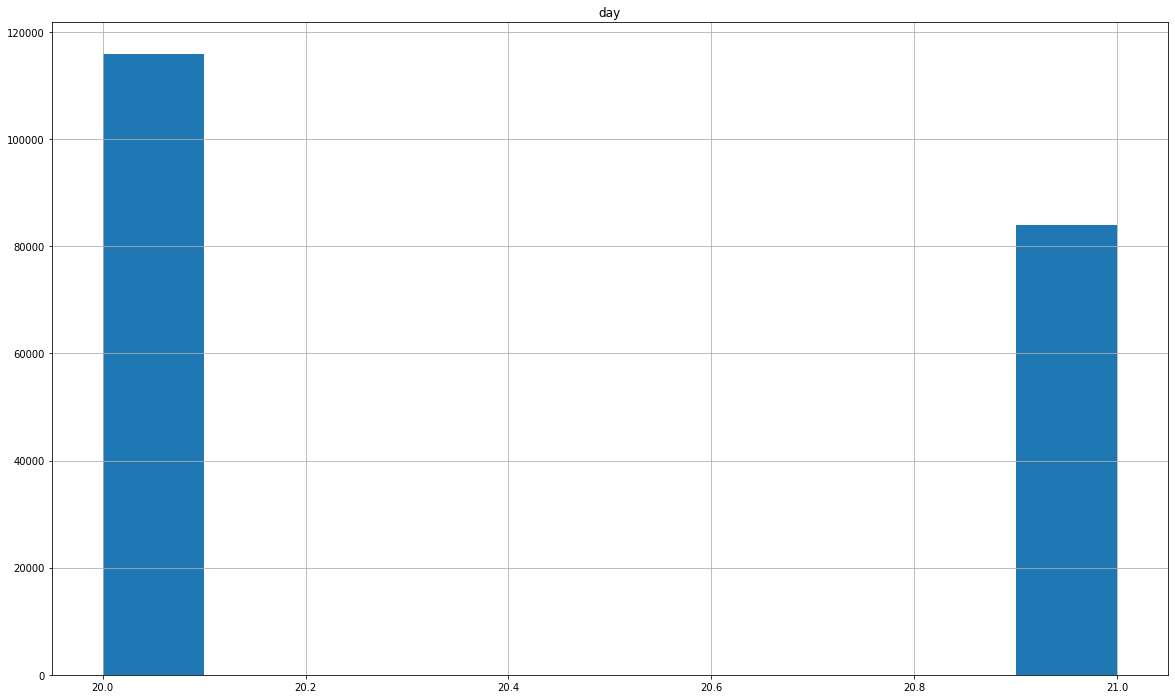

In [30]:
_ = df[["day"]].hist(figsize=(20,12))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

In [244]:
df.carts_created_at.value_counts()                   

12/30/2020    2940
8/24/2020     1806
8/27/2020     1770
12/31/2020    1738
8/31/2020     1724
              ... 
11/16/2021      28
6/8/2020        24
6/6/2020        22
6/9/2020        13
6/5/2020        13
Name: carts_created_at, Length: 447, dtype: int64

In [245]:
df.communication_type.value_counts()                   

order    120786
web       49759
phone     28050
Name: communication_type, dtype: int64

Заменим все пропуски в данных

In [246]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

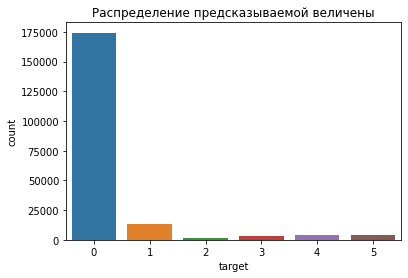

In [247]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

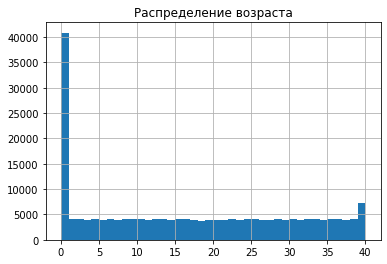

In [248]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [249]:
max(df["age_indicator"])

40.0

Взглянем на несколько величин сразу

In [250]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

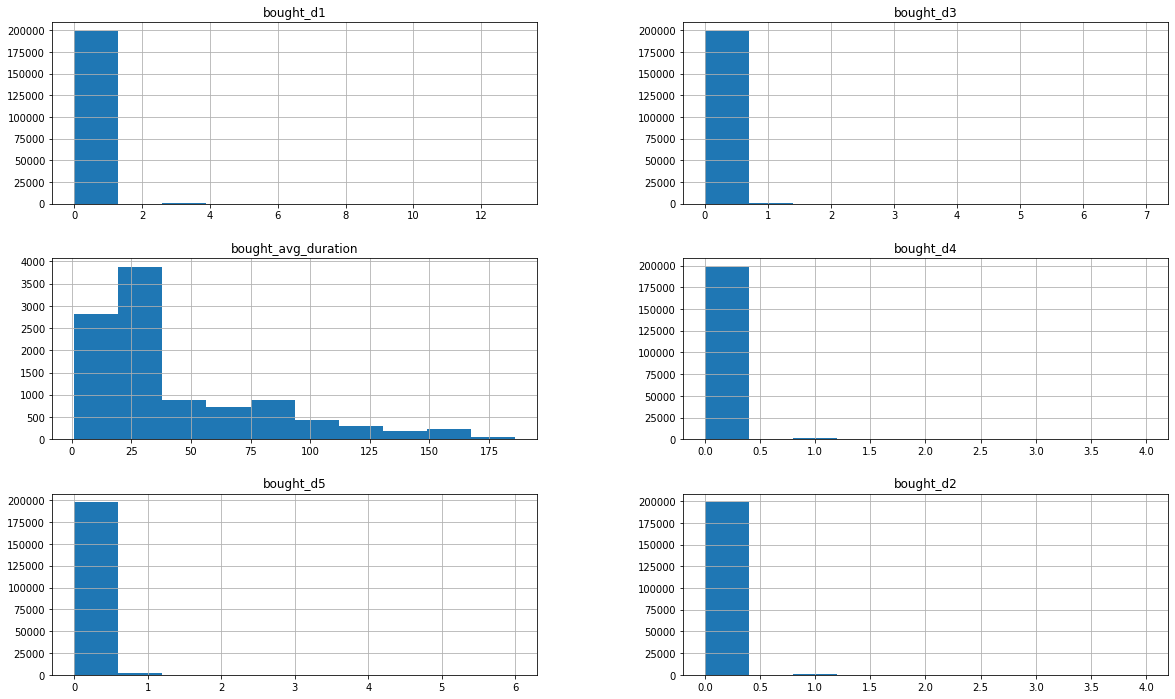

In [124]:
features = list(set(['bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration']))

_ = df[features].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [252]:
df.spent_time_to_complete_hw.value_counts()

 0.0    199999
-1.0         1
Name: spent_time_to_complete_hw, dtype: int64

In [253]:
df.bought_d4.value_counts()

0    198694
1      1262
3        40
4         4
Name: bought_d4, dtype: int64

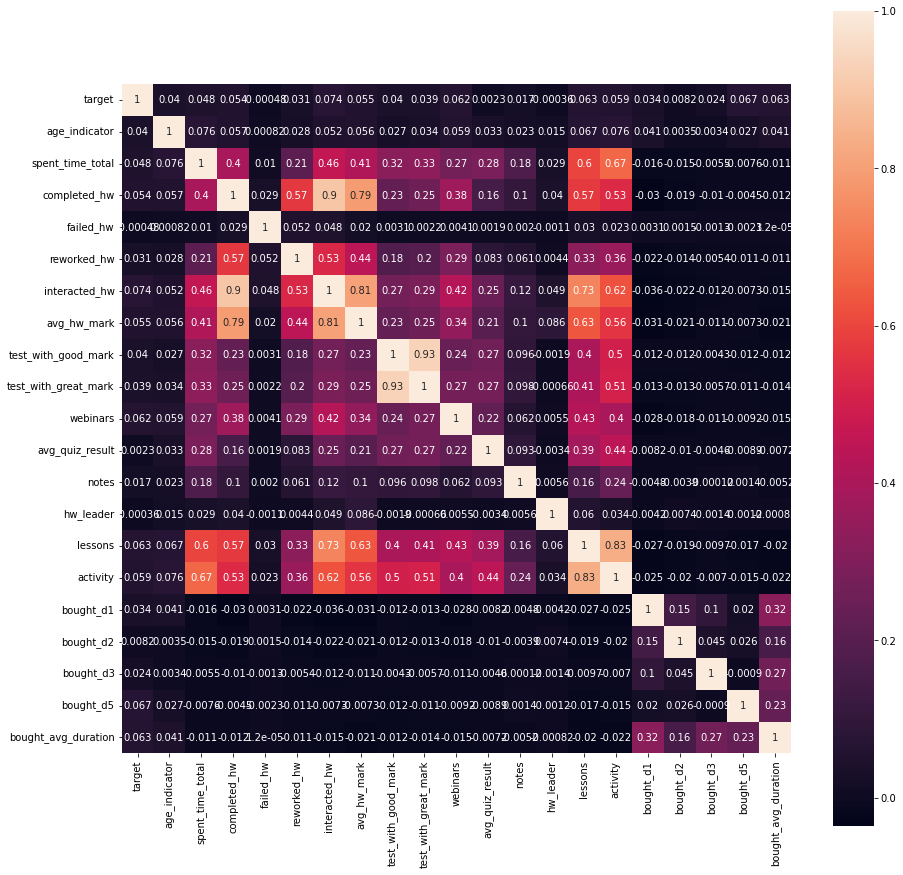

In [254]:
plt.rcParams['figure.figsize']=(15,15)

df_corr = df[["target",'age_indicator',
       'carts_created_at', 'spent_time_total',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3',
       'bought_d5', 'bought_avg_duration']]

g = sns.heatmap(df_corr.corr(), square = True, annot=True)

## Выделим выборки

In [255]:
df.dtypes[df.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O')], dtype=object)

Поместим все столбцы object в массив, для их дальнейшего удаления

In [256]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [257]:
mass_object = np.append(mass_object, "target")

In [258]:
X = df.drop(mass_object, axis = 1)
y = df[["target"]]

In [259]:
X.shape

(200000, 49)

In [260]:
X.columns

Index(['id', 'age_indicator', 'student_id', 'program_id', 'spent_time_total',
       'spent_time_to_complete_hw', 'completed_hw', 'failed_hw', 'reworked_hw',
       'interacted_hw', 'avg_hw_mark', 'test_with_good_mark',
       'test_with_great_mark', 'webinars', 'avg_quiz_result', 'notes',
       'hw_leader', 'lessons', 'activity', 'bought_d1', 'bought_d2',
       'bought_d3', 'bought_d4', 'bought_d5', 'bought_avg_duration',
       'payment_type', 'price', 'auto_payment', 'ABC', 'gender',
       'speed_recall', 'm_avg_talk_duration', 'm_avg_duration',
       'm_missed_calls', 'm_total_calls', 'm_was_conversations',
       'm_total_duration', 'p_avg_talk_duration', 'p_avg_duration',
       'p_missed_calls', 'p_total_calls', 'p_was_conversations',
       'p_total_duration', 'support_feedback_avg', 'feedback_avg_d1',
       'feedback_avg_d2', 'feedback_avg_d3', 'feedback_avg_d4',
       'feedback_avg_d5'],
      dtype='object')

In [261]:
# X.drop(columns=["id", "student_id", "spent_time_to_complete_hw"], inplace=True)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [263]:
clf = RandomForestClassifier(random_state=0, max_depth=50, n_estimators=500, max_features = 25)

In [ ]:
clf.fit(X_train, y_train)

C:\Users\evvEn\AppData\Local\Temp\ipykernel_5632\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

In [ ]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

In [ ]:
clf.classes_

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
importance_df = pd.DataFrame(clf.feature_importances_, columns=["value"],
                             index=clf.feature_names_in_).sort_values(by="value", ascending=False)
importance_df

#Validation

In [ ]:
df_test = pd.read_csv("./content/test.csv")

In [ ]:
mass_object = mass_object[mass_object!="target"]

In [ ]:
df_test = df_test.fillna(-10)

In [ ]:
X_val = df_test.drop(mass_object, axis = 1)

In [ ]:
# X_val.drop(columns=["id", "student_id", "spent_time_to_complete_hw"], inplace=True)

In [ ]:
pred_test = clf.predict(X_val)

In [ ]:
df_test["target"] = pred_test

In [ ]:
df_test=df_test[["id", "target"]]

In [ ]:
df_test.to_csv("./content/pred.csv", index=False)